In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
df = pd.read_csv("Position_Salaries.csv")
print(df.head())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [3]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1:].values

In [4]:
print(X.shape)
print(y.shape)

(10, 1)
(10, 1)


In [5]:
from sklearn.preprocessing import PolynomialFeatures
input_ = PolynomialFeatures(degree = 4)
X_transformed = input_.fit_transform(X)

In [6]:
print(X_transformed[:5])
print(X[:5])

[[  1.   1.   1.   1.   1.]
 [  1.   2.   4.   8.  16.]
 [  1.   3.   9.  27.  81.]
 [  1.   4.  16.  64. 256.]
 [  1.   5.  25. 125. 625.]]
[[1]
 [2]
 [3]
 [4]
 [5]]


In [7]:
from sklearn.preprocessing import StandardScaler
scl_x = StandardScaler()
scl_y = StandardScaler()

In [14]:
X_transformed[:, 1:] = scl_x.fit_transform(X_transformed[:, 1:])
y = scl_y.fit_transform(y)

In [9]:
print(X_transformed[:5])
print(y[:5])

[[ 1.         -1.5666989  -1.15669692 -0.92459328 -0.78691732]
 [ 1.         -1.21854359 -1.06416117 -0.90312676 -0.78225604]
 [ 1.         -0.87038828 -0.90993491 -0.84486052 -0.76205716]
 [ 1.         -0.52223297 -0.69401815 -0.73139468 -0.70767556]
 [ 1.         -0.17407766 -0.41641089 -0.54432937 -0.59300807]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]]


In [10]:
from LinearRegression import LinearRegression
lr = LinearRegression(max_iter = 8000, learning_rate = 0.001)
lr.fit(X_transformed, y)

In [11]:
y_pred = lr.predict(X_transformed)

y_pred = scl_y.inverse_transform(y_pred)
y = scl_y.inverse_transform(y)

print(y_pred[:5])
print(y[:5])

[[43854.21773862]
 [35627.22286513]
 [36035.83645903]
 [50188.0538222 ]
 [84452.6661392 ]]
[[ 45000.]
 [ 50000.]
 [ 60000.]
 [ 80000.]
 [110000.]]


In [12]:
points = 30
X_plot = np.linspace(X.min(), X.max(), points).reshape(points, 1)
X_plot_transformed = input_.transform(X_plot)
X_plot_transformed[:, 1:] = scl_x.transform(X_plot_transformed[:, 1:])

y_plot = lr.predict(X_plot_transformed)
y_plot = scl_y.inverse_transform(y_plot)

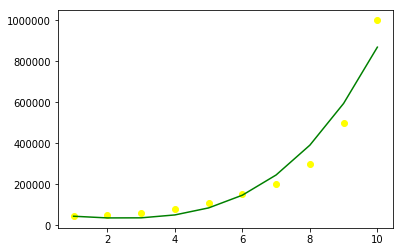

In [13]:
plt.scatter(X, y, color = "yellow")
plt.plot(X, y_pred, color = "green")
plt.show()